##### STA 141B Data & Web Technologies for Data Analysis

### Lecture 15, 02/24/26, Visualization

### Today's topics
- Static plots:
    - Plotnine
    - Matplotlib and Seaborn
    - (a little bit of Pandas.plot)
- Interactive plots:
    - Maps
 
### Data Sets

 - `dogs_full.csv`
 - `fluidmilk.xlsx`
 - `yolo_food.feather`

To show the plots in Jupyter notebook, use the following command:

In [51]:
%matplotlib inline

# Static plots

Our focus right now is _static_ visualization, where the visualization is a still image. So what packages should you actually use?


* __matplotlib__ is useful to know, since many other packages use matplotlib under the hood. That said, using matplotlib alone to create plots is painful; matplotlib is _low-level_, so it's flexible but simple plots may take [5 lines of code or more][ex]. The matplotlib PyPlot tools may be convenient if you already know MATLAB.

* __pandas__ provides built-in plotting functions, which can be convenient but are more limited than the packages above. They're also inconsistent about the expected format of the data.

* __plotnine__ is convenient if you already know ggplot2. It's relatively new, so there are some bugs and missing features. In fact, ggplot2 is abstracting data visualization into different tasks and handling them seperately in a very clean way. It was introduced by the genius [Hadley Wickham](https://hadley.nz/).

* __seaborn__ is designed specifically for making statistical plots. It's well-documented and stable. Most of the package's functions expect tidy data as input.


We don't have time to exhaustively cover visualization packages for Python. You're welcome to explore other packages while doing the assignments for this class.

Next week, we'll see some of Python's _interactive_ visualization packages.

[ex]: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/

See the [plotnine documentation](https://plotnine.readthedocs.io/en/latest/)! Also see the [ggplot2 documentation](https://ggplot2.tidyverse.org/reference/) and the [ggplot2 cheatsheet](https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf). If you run into a bug, you may want to check for a work-around on the [plotnine bug tracker](https://github.com/has2k1/plotnine/issues).

#### Data
Before we talk about visualizations, we have to preprocess some data:

In [2]:
import numpy as np
import pandas as pd

milk = pd.read_excel("../data/fluidmilk.xlsx", skiprows = 1)
milk.head(4)

,Unnamed: 0,Whole,Reduced-fat \n(2% milk fat),Low-fat \n(1% milk fat),Skim,Flavored \nwhole 1,"Flavored, \nother than whole",Buttermilk,Eggnog,Total 2
0,1975,36188.0,8726.0,2742.0,2480.0,1366.0,719.0,1011.0,76.0,53308.0
1,1976,35241.0,9556.0,2875.0,2524.0,1475.0,864.0,1021.0,87.0,53643.0
2,1977,34036.0,10423.0,3003.0,2617.0,1446.0,1062.0,1007.0,94.0,53688.0
3,1978,33235.0,11017.0,3233.0,2543.0,1359.0,1097.0,983.0,94.0,53561.0


In [3]:
milk.columns = milk.columns.str.replace('\n', '')
milk = milk.rename(columns=lambda df: df.strip(' 12'))
milk.columns.values[[0,2,3,5,6]] = np.array(['Year', 'Reduced', 'Low', 
                                             'Flavored Whole', 'Flavored Other'])
milk = milk[:-4] # get rid of the last four rows
milk = milk.drop(columns = 'Total')

milk['Year'] = pd.to_numeric(milk['Year'])

milk = milk.set_index("Year") 

milk1 = milk.stack()
milk1 = milk1.reset_index()
milk1.columns.values[[False, True, True]] = np.array(["Kind", "Sales"])

In [4]:
milk

,Whole,Reduced,Low,Skim,Flavored Whole,Flavored Other,Buttermilk,Eggnog
Year,,,,,,,,
1975,36188.0,8726.0,2742.0,2480.0,1366.0,719.0,1011.0,76.0
1976,35241.0,9556.0,2875.0,2524.0,1475.0,864.0,1021.0,87.0
1977,34036.0,10423.0,3003.0,2617.0,1446.0,1062.0,1007.0,94.0
1978,33235.0,11017.0,3233.0,2543.0,1359.0,1097.0,983.0,94.0
1979,32480.0,11762.0,3281.0,2604.0,1236.0,1129.0,939.0,94.0
1980,31253.0,12435.0,3483.0,2636.0,1075.0,1197.0,927.0,95.0
1981,30397.0,13088.0,3574.0,2583.0,843.0,1288.0,926.0,100.0
1982,29350.0,13501.0,3537.0,2449.0,710.0,1283.0,950.0,104.0
1983,28871.0,14183.0,3455.0,2474.0,749.0,1374.0,1006.0,112.0


In [5]:
milk1.head(10)

,Year,Kind,Sales
0,1975,Whole,36188.0
1,1975,Reduced,8726.0
2,1975,Low,2742.0
3,1975,Skim,2480.0
4,1975,Flavored Whole,1366.0
5,1975,Flavored Other,719.0
6,1975,Buttermilk,1011.0
7,1975,Eggnog,76.0
8,1976,Whole,35241.0
9,1976,Reduced,9556.0


## Jupyter and matplotlib

Jupyter notebooks can display most static visualizations and some interactive visualizations. If you're going to use visualization packages that depend on matplotlib, it's a good idea to set up your notebook by running:

In [6]:
%matplotlib inline

In [7]:
# Initialize matplotlib for jupyter: 
%matplotlib inline 

import matplotlib.pyplot as plt

# Change the size of the plot
plt.rcParams["figure.figsize"] = [5, 5]

If we want to adjust the size and layout, we have to learn more about matplotlib.

### The Basics of matplotlib

See the [matplotlib documentation](https://matplotlib.org/stable/users/index.html)!

First, let's change the size of the figures in the notebook. To do that, we need to go back to the code we used to initialize matplotlib, and adjust `rcParams`, matplotlib's default settings.

### Jargon

The most important thing to know is matplotlib's jargon:

* _Figure_: Container for plots.
* _Axes_: Container for components of a plot ("primitives"). In other words, an axes is a single plot.
* _Axis_: Container for components of an axis. An axis is a single axis.
* _Tick_: A container for tick marks on an axis.

All of the containers and the primitives are called _Artists_.

![asd](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

First, we have to set up fixure and axes.

Matplot cheat sheet [see here][link1] .

An exhaustive overview of different plottypes can be found [here](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#15.-Ordered-Bar-Chart)

[link1]:https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

<Figure size 500x500 with 0 Axes>

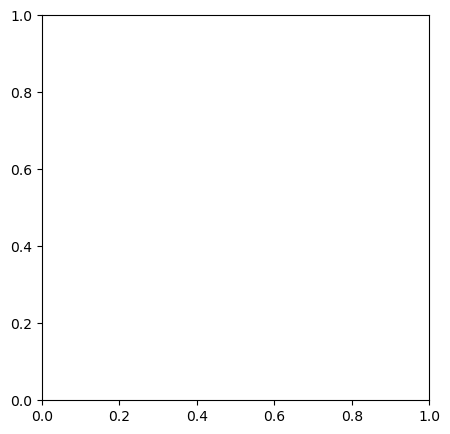

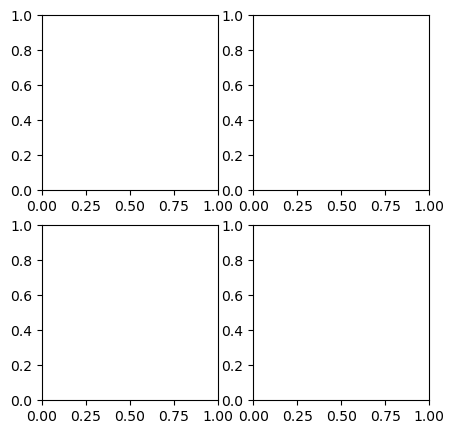

In [8]:
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
plt.show()
plt.close()

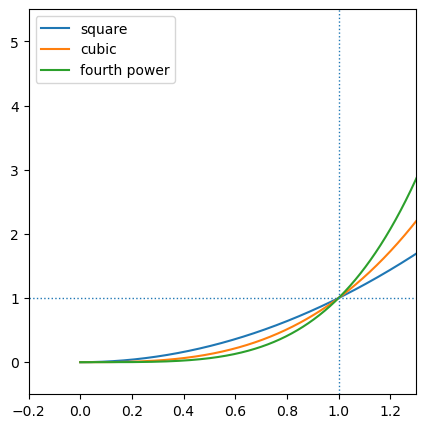

In [9]:
fig, ax = plt.subplots()

x = np.linspace(0, 1.5, 1000)
ax.plot(x, x**2, x, x**3, x, x**4)
ax.legend(loc='upper left', labels=['square', 'cubic', 'fourth power']) # we only have to add names, because we have not specified labels for the lines yet
plt.axhline(y=1, linestyle=':', linewidth=1, label='Phase transition')
plt.axvline(x=1, linestyle=':', linewidth=1, label='Phase transition')
ax.set_ylim(-0.5, 5.5)
ax.set_xlim(-0.2, 1.3)
plt.show()
plt.close()

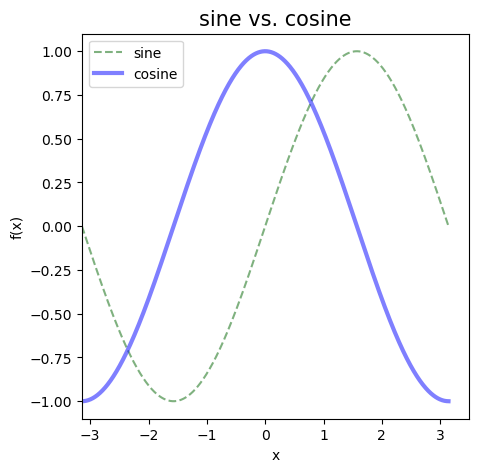

In [10]:
# N
#import matplotlib.pyplot as plt
#import numpy as np
# %matplotlib inline 
x = np.linspace(-np.pi,np.pi,1000) # data

# fig = plt.figure() # figure
# ax = fig.add_subplot(111)
fig, ax = plt.subplots()
plt.plot(x, np.sin(x), alpha = 0.5, color = "darkgreen", ls = "--", label = "sine")
plt.plot(x, np.cos(x), alpha = 0.5, color = "blue", ls = "solid", linewidth = 3, label = "cosine")
plt.title("sine vs. cosine", fontsize = 15)

ax.set(ylabel='f(x)', xlabel='x')
ax.legend(loc='best')
ax.set_xlim(-np.pi, 3.5)
      
plt.show()

#### Saving Figures

You can save figures to an image file with the `.savefig()` method.

Take care: after plt.show() the image was cleared!

In [11]:
plt.savefig('../output/sin_vs_cosine.png')
plt.close()

In [12]:
fig, ax = plt.subplots()
plt.plot(x, np.sin(x), alpha = 0.5, color = "darkgreen", ls = "--", label = "sine")
plt.plot(x, np.cos(x), alpha = 0.5, color = "blue", ls = "solid", linewidth = 3, label = "cosine")
plt.title("sine vs. cosine", fontsize = 15)

ax.set(ylabel='f(x)', xlabel='x')
ax.legend(loc='best')
ax.set_xlim(-np.pi, 3.5)
plt.savefig('../output/sin_vs_cosine.png')
plt.close()

## Pandas plot

[Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) and a little bit more details

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()
df

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64

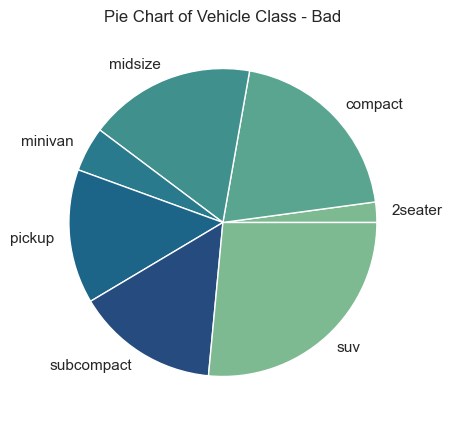

In [33]:
# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(5, 5))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()
plt.close()

## Plotnine

We start with the plotnine package, an implementation of ggplot2 for Python. Unlike packages we've seen so far, plotnine is not included with Anaconda. To install the package:

* On Windows, run `conda install -c conda-forge plotnine` in an Anaconda Prompt (find it in the start menu)
* On MacOS or Linux, run `conda install -c conda-forge plotnine` in the Terminal

You may have to restart Jupyter after installing. 

In [13]:
!pip install plotnine

In [14]:
import plotnine as p9

p9.__version__

'0.15.0'

[Plotnine Cheatsheet](https://github.com/rstudio/cheatsheets/blob/main/plotnine.pdf)

### Plotnine Grammar and Common Layers

#### Key Grammar of Plotnine
Plotnine implements the grammar of graphics, where a plot is constructed in layers:
1. **Data:** The dataset to be visualized.
2. **Aesthetics (aes):** Mappings between variables in the data and visual properties (e.g., `x`, `y`, `color`).
3. **Geometric Objects (geoms):** The type of plot elements to display (e.g., `geom_line`, `geom_point`).
4. **Facets:** Create multiple subplots for subsets of data.
5. **Scales:** Define how data values map to visual properties.
6. **Themes:** Customize the appearance of the plot.

#### Common Layers in Plotnine
1. `geom_point()`: Scatter plot.
2. `geom_line()`: Line plot.
3. `geom_bar(stat='identity')`: Bar chart.
4. `geom_histogram()`: Histogram.
5. `geom_boxplot()`: Box plot.
6. `facet_wrap(~var)`: Facet by a variable.
7. `scale_color_manual()`: Custom colors for categories.
8. `labs(title, x, y)`: Add labels and title.
9. `theme_*`: Customize themes (e.g., `theme_minimal()`).

#### Example: Plotting with Plotnine
The following example creates a line plot with the `milk` dataset.

The syntax of plotnine closely follows the syntax of R's ggplot2. In R, we would write

```r
ggplot(milk, aes(x = Year, y = Sales, color = Kind)) + geom_line() 
```

One important difference is that plotnine requires that we quote variable names.

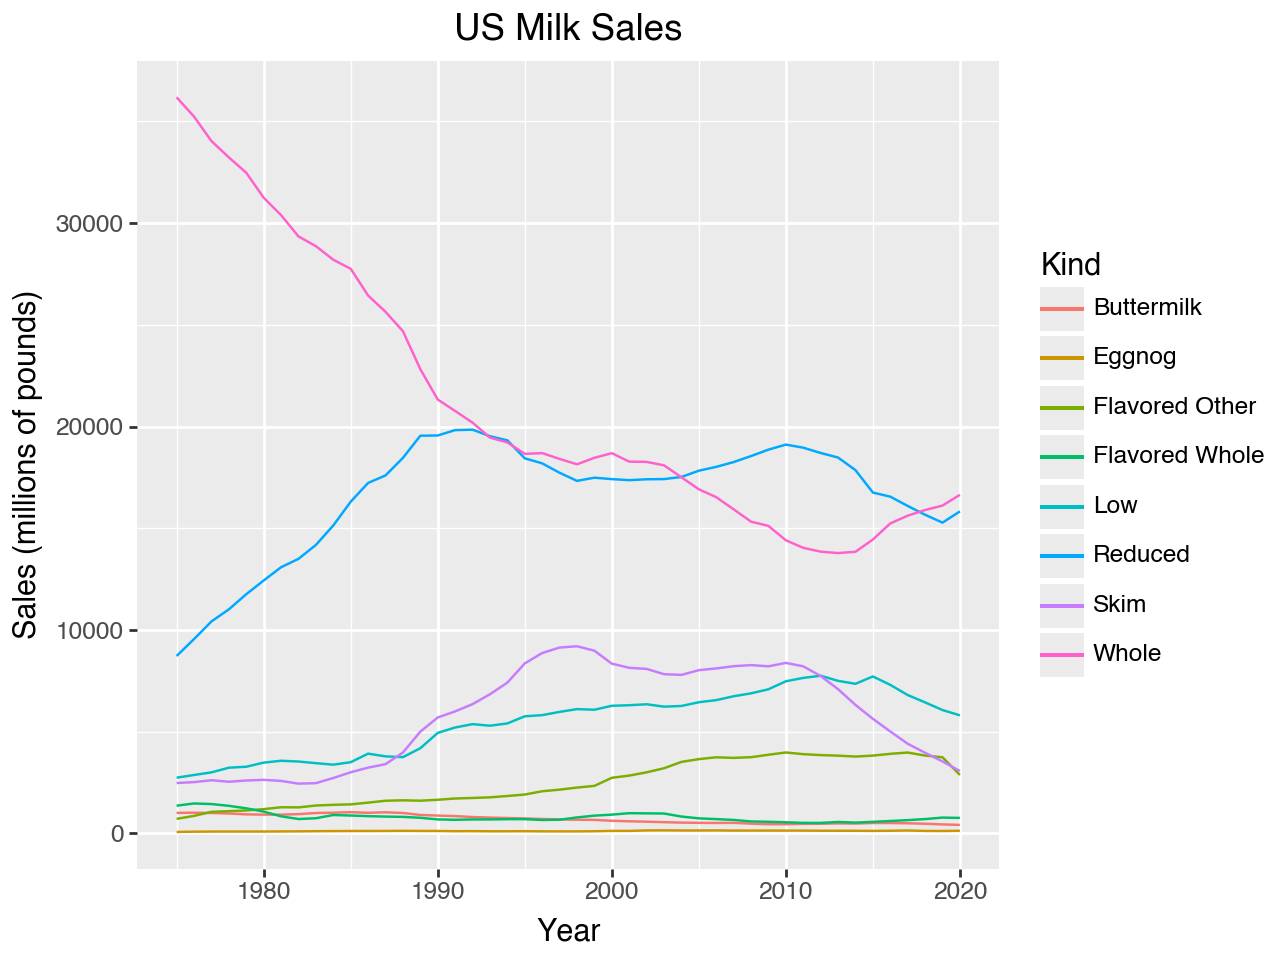

In [15]:
p = (
    p9.ggplot(milk1, p9.aes(x="Year", y="Sales", color="Kind"))  
        # Create a ggplot object:
        #   - milk1: The DataFrame containing the data to plot
        #   - p9.aes(): Defines the aesthetic mappings:
        #       - x="Year": Maps the 'Year' column to the x-axis
        #       - y="Sales": Maps the 'Sales' column to the y-axis
        #       - color="Kind": Maps the 'Kind' column to different colors 
    + p9.geom_line()  # Add a line geometry to the plot, connecting data points with lines
    + p9.labs(title="US Milk Sales", y="Sales (millions of pounds)")  
        # Add labels to the plot:
        #   - title: Sets the title of the plot
        #   - y: Sets the label for the y-axis
    + p9.theme_gray() # theme_classic(), theme_void()
#    + p9.scale_color_brewer("qualitative", palette="Dark2")
)
p

In [16]:
milk2 = milk[['Whole', 'Reduced']]
milk2 = milk2.reset_index()
milk2.head()

,Year,Whole,Reduced
0,1975,36188.0,8726.0
1,1976,35241.0,9556.0
2,1977,34036.0,10423.0
3,1978,33235.0,11017.0
4,1979,32480.0,11762.0


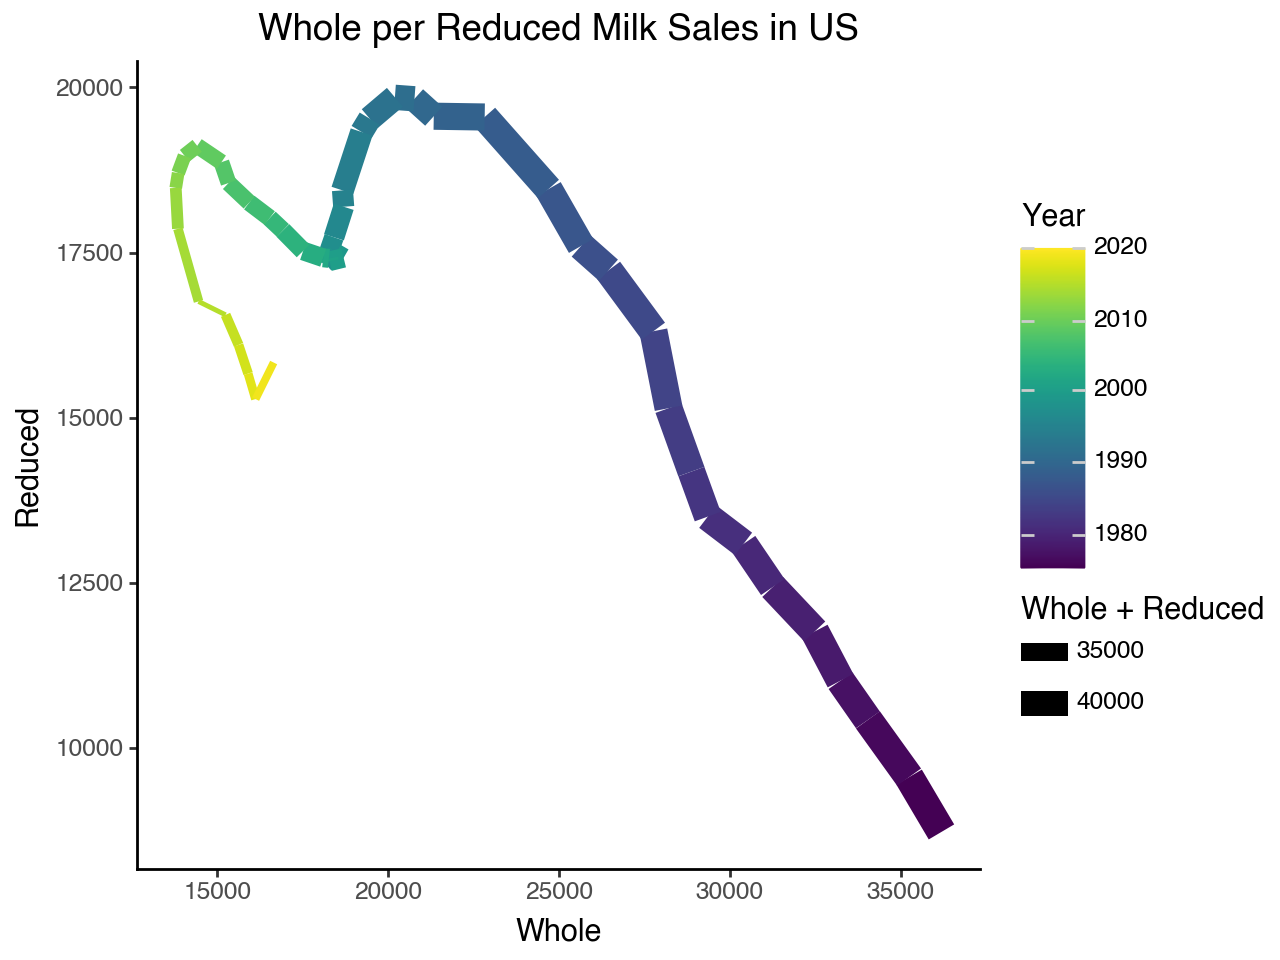

In [17]:
p = (
    p9.ggplot(milk2, p9.aes(x="Whole", y="Reduced"))  
        # Create a ggplot object:
        #   - milk2: The DataFrame containing the data
        #   - p9.aes(): Defines the aesthetic mappings:
        #       - x="Whole": Maps 'Whole' milk sales to the x-axis
        #       - y="Reduced": Maps 'Reduced' milk sales to the y-axis 
    + p9.theme_classic()  # Apply the classic theme for a clean look
    + p9.geom_path(p9.aes(color="Year", size="Whole + Reduced"), linejoin="mitre")  
        # Add a path geometry:
        #   - p9.aes(): Maps 'Year' to color and the sum of 'Whole' and 'Reduced' to size
        #   - linejoin="mitre": Specifies how lines connect (sharp corners)
    + p9.labs(title="Whole per Reduced Milk Sales in US")  # Set the title of the plot
)
p

`plotnine` includes the familiar `p9.ggsave()` function for saving a visualization to an image file.

In [18]:
p = (
    p9.ggplot(milk2, p9.aes(x="Whole", y="Reduced"))  
        # Create a ggplot object:
        #   - milk2: The DataFrame containing the data
        #   - p9.aes(): Defines the aesthetic mappings:
        #       - x="Whole": Maps 'Whole' milk sales to the x-axis
        #       - y="Reduced": Maps 'Reduced' milk sales to the y-axis 
    + p9.theme_classic()  # Apply the classic theme for a clean look
    + p9.geom_path(p9.aes(color="Year", size="Whole + Reduced"), linejoin="mitre")  
        # Add a path geometry:
        #   - p9.aes(): Maps 'Year' to color and the sum of 'Whole' and 'Reduced' to size
        #   - linejoin="mitre": Specifies how lines connect (sharp corners)
    + p9.labs(title="Whole per Reduced Milk Sales in US")  # Set the title of the plot
)
# p9.ggsave(plt)
p9.ggsave(p, "../output/my_plot.png", width=7, height=6, units="in")

/opt/anaconda3/lib/python3.13/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 7 x 6 in image.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: ../output/my_plot.png


## Plotting with seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn library is included as part of the Anaconda distribution.

See the [seaborn documentation](https://seaborn.pydata.org/) and the introduction [therein](https://seaborn.pydata.org/tutorial/introduction.html)!

In [19]:
import seaborn as sns

sns.__version__

'0.13.2'

### Seaborn Grammar and Common Functions

Seaborn is a Python library for statistical data visualization, built on top of Matplotlib. It simplifies the creation of complex visualizations with minimal code and provides support for informative, aesthetic plots.

#### Key Grammar of Seaborn
1. **Dataset-Oriented:** Seaborn works directly with Pandas DataFrames, making it easy to visualize relationships between variables.
2. **Aesthetics (x, y, hue, size, style):** Mappings between data variables and visual properties like color (`hue`), size, and line style.
3. **Statistical Estimation:** Many functions automatically compute and plot aggregate statistics (e.g., means, confidence intervals).
4. **Themes:** Built-in themes (`set_style`) make plots visually appealing and consistent.
5. **Facets:** `FacetGrid` enables creation of subplots for subsets of data.

#### Common Seaborn Functions
1. `sns.scatterplot()`: Scatter plot.
2. `sns.lineplot()`: Line plot.
3. `sns.barplot()`: Bar chart with aggregated data.
4. `sns.histplot()`: Histogram.
5. `sns.boxplot()`: Box plot.
6. `sns.violinplot()`: Violin plot.
7. `sns.heatmap()`: Heatmap for matrix data.
8. `sns.pairplot()`: Pairwise plots for numerical relationships.
9. `sns.catplot()`: Plot for categorical data.

#### Example: Plotting with Seaborn
The following example creates a scatter plot with the `penguins` dataset.

In seaborn, the __hue__ parameter determines which column in the data frame should be used for colour encoding. 

In [20]:
%matplotlib inline

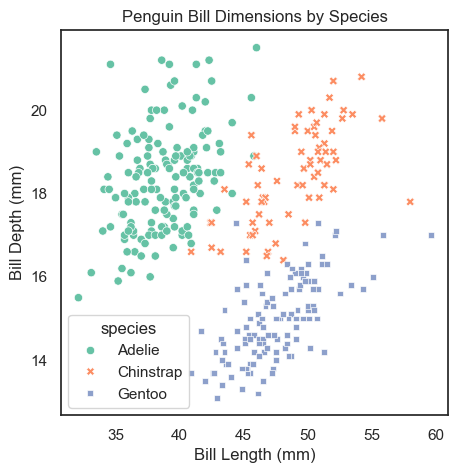

In [21]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd

# Load example dataset
penguins = sns.load_dataset("penguins")

plt.figure()

# Change the default theme to "whitegrid"
sns.set_theme(style = 'white', palette = 'Set2')  # dark/white/whitegrid/darkgrid/ticks, ... palette = Set2, crest, tab10
# find more colors:
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
# and the theme:
# https://seaborn.pydata.org/generated/seaborn.set_theme.html

# Creating a scatter plot
plot = sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species"
)

# Customizing the plot
plot.set_title("Penguin Bill Dimensions by Species")
plot.set_xlabel("Bill Length (mm)")
plot.set_ylabel("Bill Depth (mm)")

# Display the plot
plt.savefig('../output/penguins.png')
plt.show()
# plt.savefig('penguins.png')

plt.close() # clear plot or otherwise it will overwrite the next plot if plt.figure() is not used at the beginning

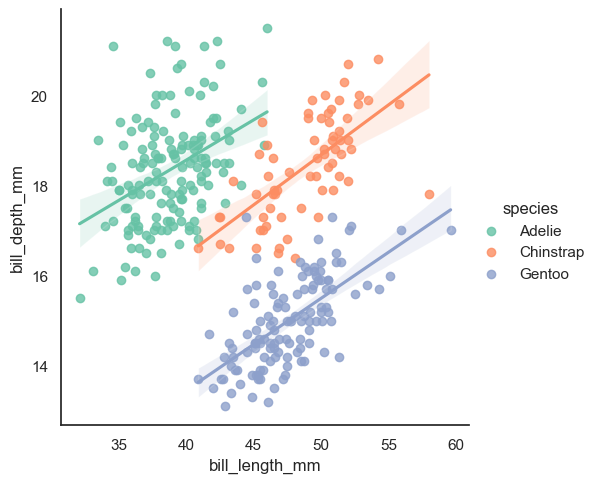

In [22]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.show()
plt.close()

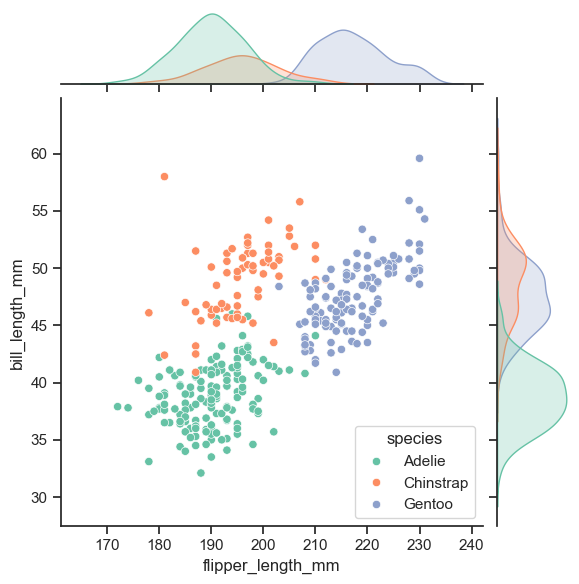

In [23]:
sns.set_theme(style = 'ticks', palette = 'Set2')
ax = sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()
plt.close()

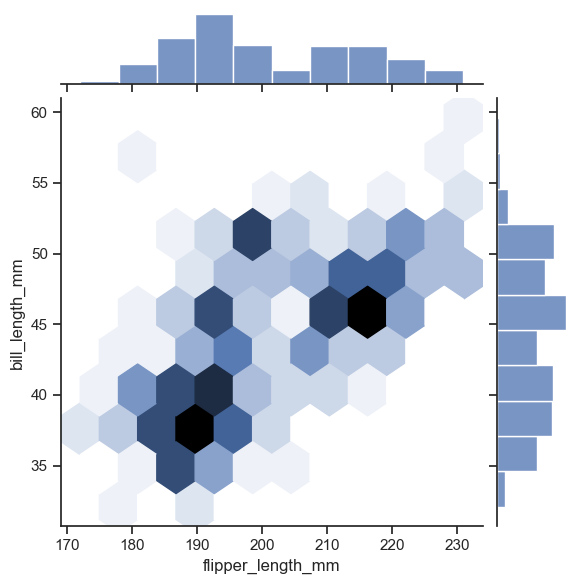

In [24]:
sns.set_theme(style="ticks")
ax = sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="hex")
plt.show()
plt.close()

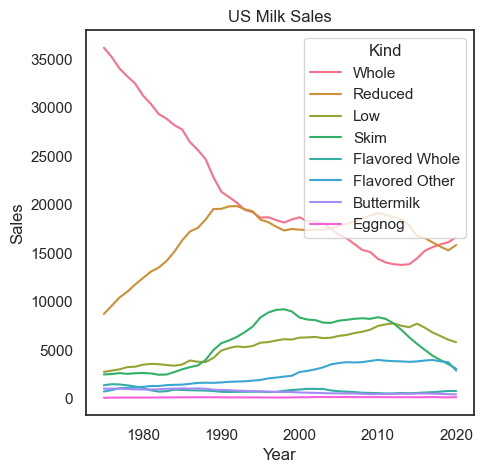

In [25]:
# plt.figure()
sns.set_theme(style='white', palette = 'crest')

ax = sns.lineplot(x = "Year", y = "Sales", hue = "Kind", data = milk1, legend = True)
ax.set_title("US Milk Sales")
plt.show()
plt.close()

In [26]:
# Change the size of the plot
plt.rcParams["figure.figsize"] = [7, 7]

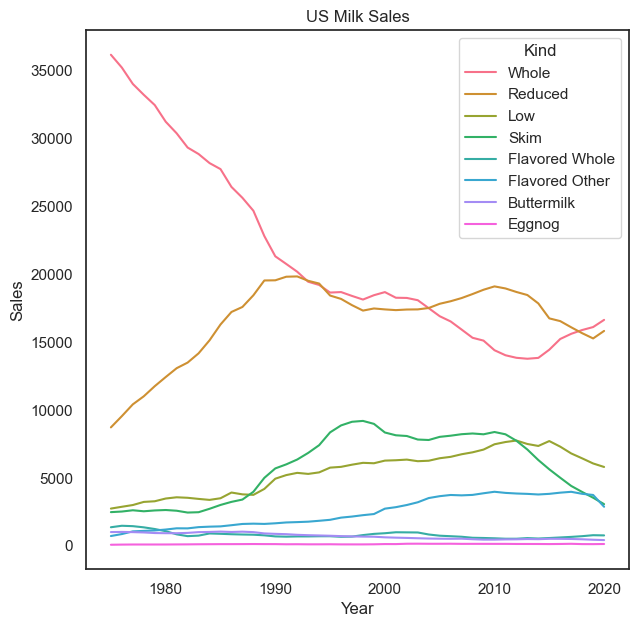

In [27]:
# plt.figure()
ax = sns.lineplot(x = "Year", y = "Sales", hue = "Kind", data = milk1, legend = True)
ax.set_title("US Milk Sales")
plt.show()
plt.close()

In [28]:
plt.savefig('../output/seabornplot.png') # saves current plot via matplotlib
ax.get_figure().savefig('../output/output.png') # saves with seaborn

In [29]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<Figure size 700x700 with 0 Axes>

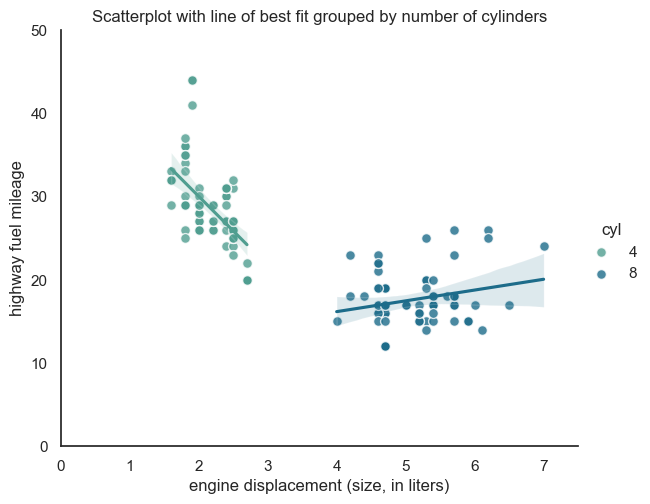

In [30]:
# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=5, aspect=1.2, robust=False, palette='crest', # height*aspect = width
                     scatter_kws=dict(s=50, linewidths=1, edgecolors='white'), # s = size of circles
                     truncate = True) # line does not end at last data point
 
# Decorations
gridobj.set(xlim=(0, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=12)
plt.ylabel('highway fuel mileage')
plt.xlabel('engine displacement (size, in liters)')
plt.show()
plt.close()

## Comparing Packages

Let's use the familiar dogs dataset to further compare the different plotting packages.

In [52]:
dogs = pd.read_csv("../data/dogs_full.csv")
dogs.head()

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0
3,Cairn Terrier,terrier,3.53,59,48.0,21992.0,35.0,13.84,2.0,435.0,324.0,weekly,high,4.0,2.0,small,14.0,10.0
4,Welsh Springer Spaniel,sporting,3.34,130,81.0,20224.0,31.0,12.49,1.0,750.0,324.0,weekly,high,5.0,4.0,medium,NaN,18.0


In [53]:
dogs.tail()

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
167,Weimaraner,sporting,NaN,32,NaN,NaN,21.0,NaN,1.0,562.0,NaN,weekly,high,NaN,NaN,large,NaN,25.0
168,Welsh Terrier,terrier,NaN,99,NaN,NaN,53.0,NaN,0.0,843.0,NaN,weekly,high,NaN,NaN,small,20.0,15.0
169,Wire Fox Terrier,terrier,NaN,100,NaN,NaN,51.0,13.17,0.0,668.0,NaN,NaN,NaN,NaN,NaN,small,17.5,15.0
170,Wirehaired Pointing Griffon,sporting,NaN,92,NaN,NaN,46.0,8.80,0.0,755.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,22.0
171,Xoloitzcuintli,non-sporting,NaN,155,NaN,NaN,NaN,NaN,NaN,717.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,16.5


### Scatter Plots

Plot the number of dogs in each category.

In [54]:
counts = dogs["group"].value_counts()
counts

group
terrier         28
sporting        28
working         27
hound           26
herding         25
toy             19
non-sporting    19
Name: count, dtype: int64

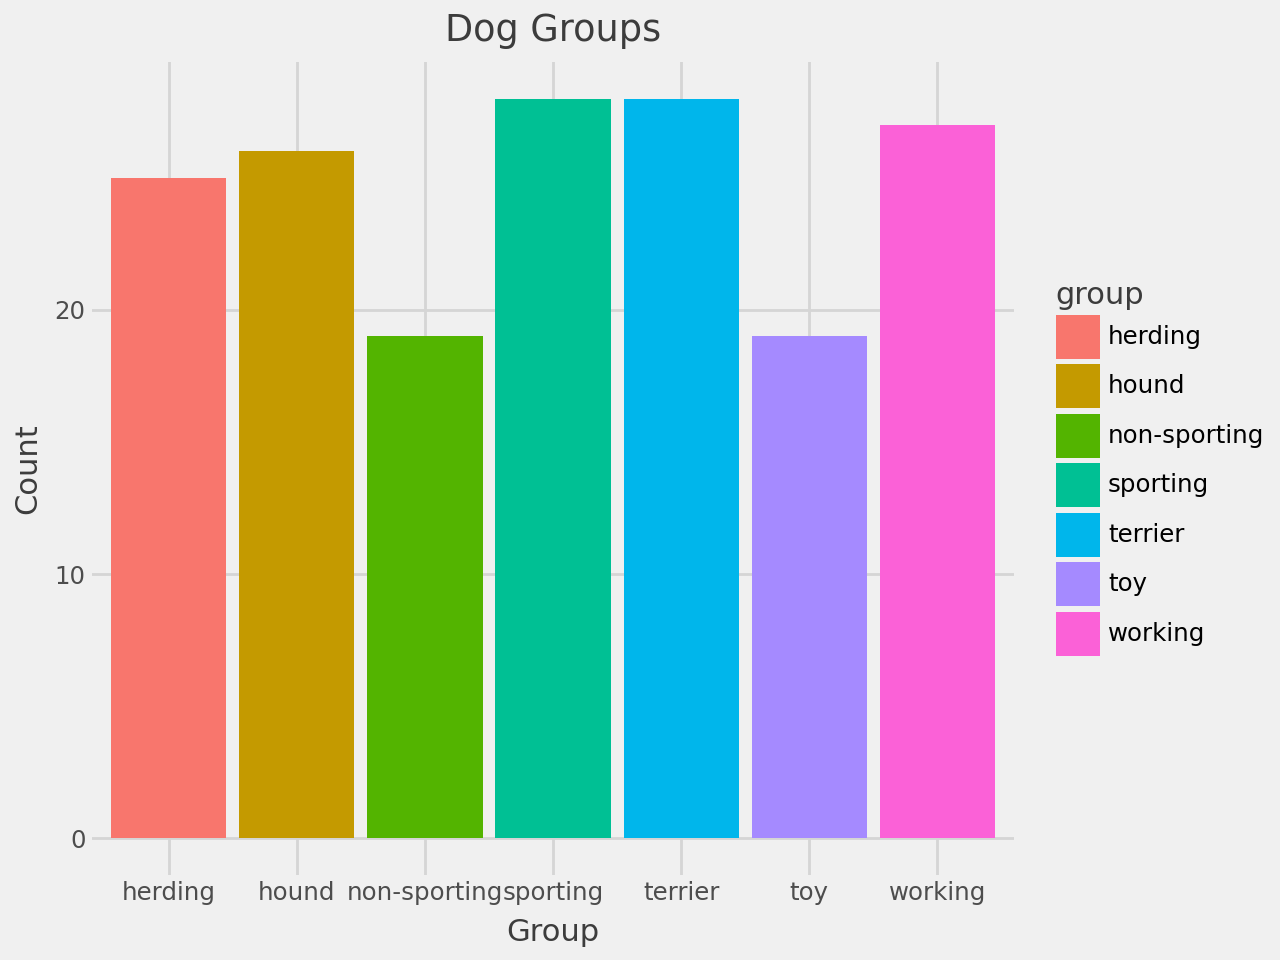

In [55]:
# Plotnine
p = (p9.ggplot(dogs, p9.aes(x = "group", fill = 'group')) + p9.geom_bar(stat = "count")) # or change color to fill
p + p9.labs(title = "Dog Groups", x = "Group", y = "Count") + p9.theme_538()

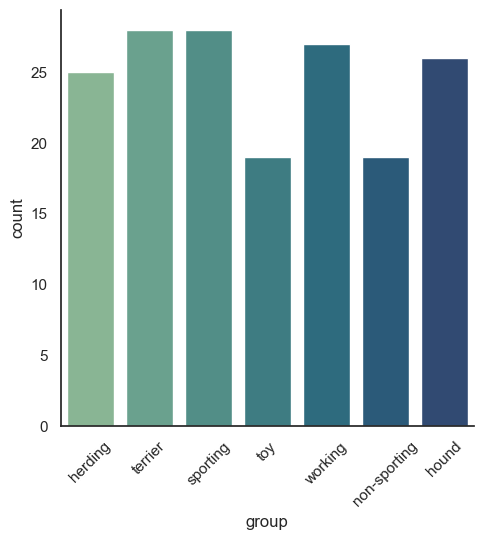

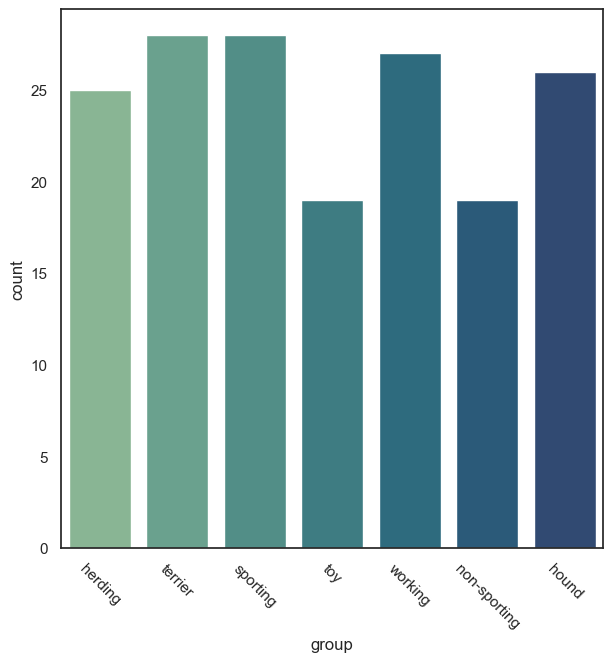

In [41]:
# Seaborn
# plt.figure()
p = sns.catplot(x='group', data = dogs, kind = "count", palette = "crest", hue = 'group') # violin
p.tick_params(axis='x', rotation=45)
plt.show()
plt.close()

# alternatively
p = sns.countplot(x="group", data = dogs, palette = "crest", hue = 'group')
p.tick_params(axis='x', rotation=-45)
plt.show()
plt.close()

In [56]:
# Restore default rcParams
plt.rcdefaults()

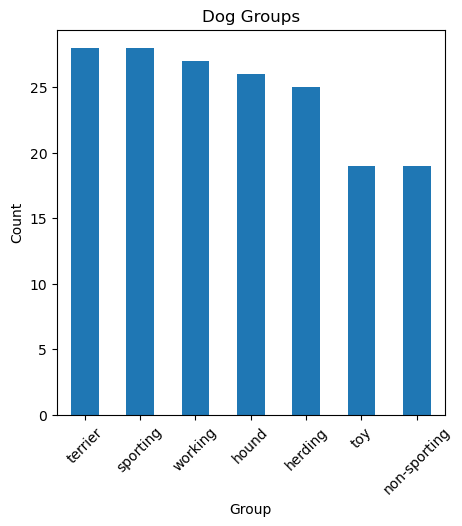

In [57]:
# Pandas
ax = counts.plot.bar(style = "x", rot = 45, figsize = [5,5])
ax.set(title = "Dog Groups", xlabel = "Group", ylabel = "Count")
plt.show()
plt.close()

### Box Plots

Plot the distribution of dog longevity, grouped by category.

/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 37 rows containing non-finite values.


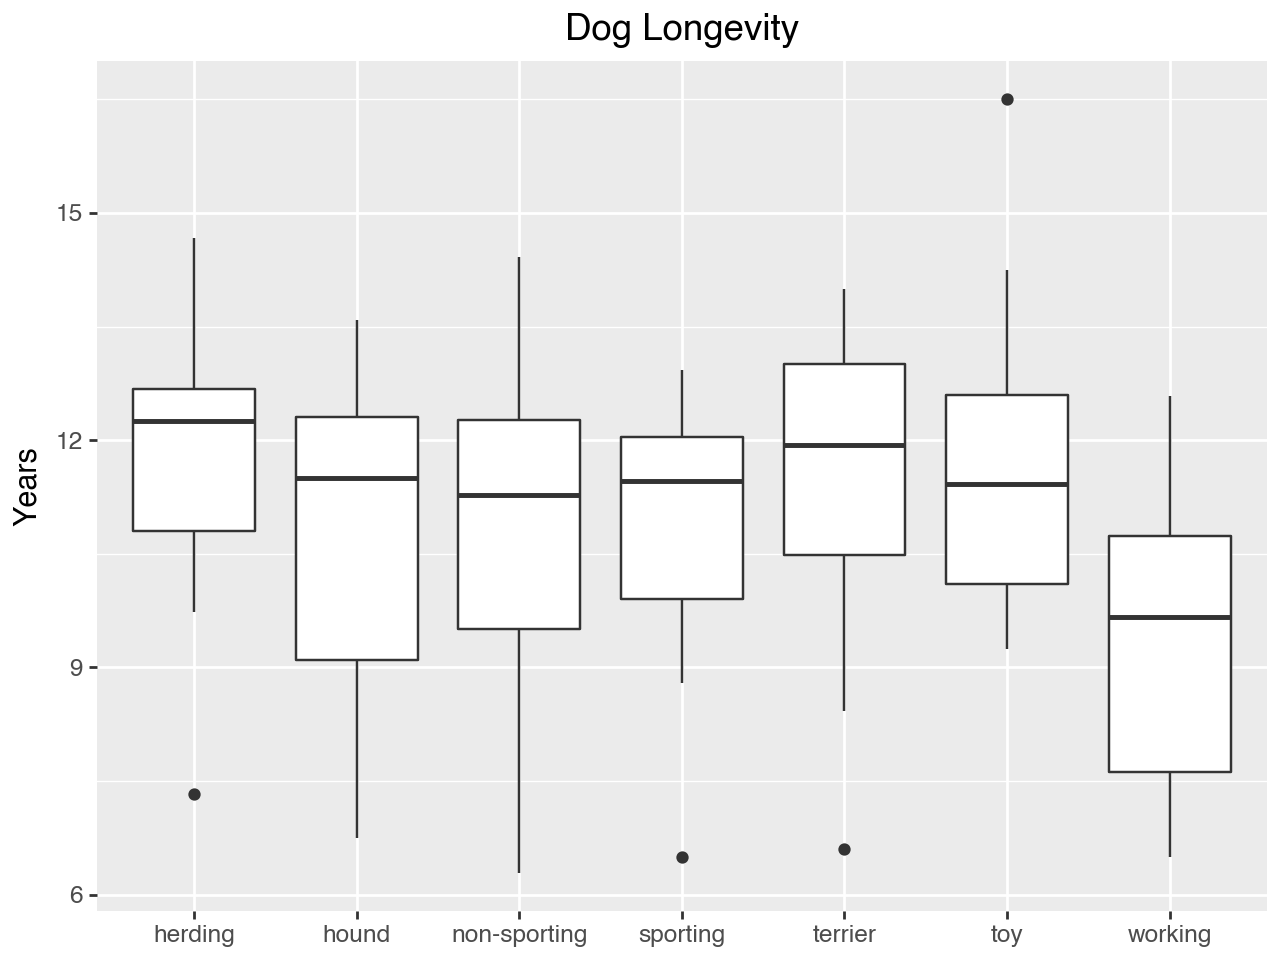

In [58]:
# Plotnine
( 
    p9.ggplot(dogs, p9.aes("group", "longevity")) 
    + p9.geom_boxplot()
    + p9.labs(title = "Dog Longevity", x = "", y = "Years")
)

/var/folders/df/79c6nd413h713v6l3znh208w0000gq/T/ipykernel_21706/1246345669.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


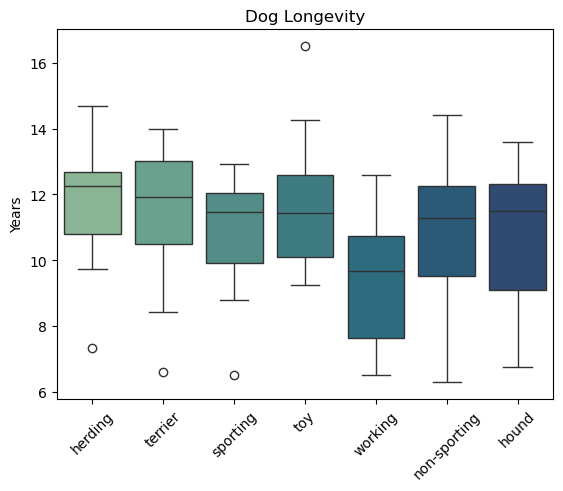

In [59]:
# Seaborn
fix, ax = plt.subplots()
ax = sns.boxplot(x = "group", y = "longevity", data = dogs, palette = "crest", hue = 'group')
ax.set(title = "Dog Longevity", xlabel = "", ylabel = "Years")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()
plt.close()

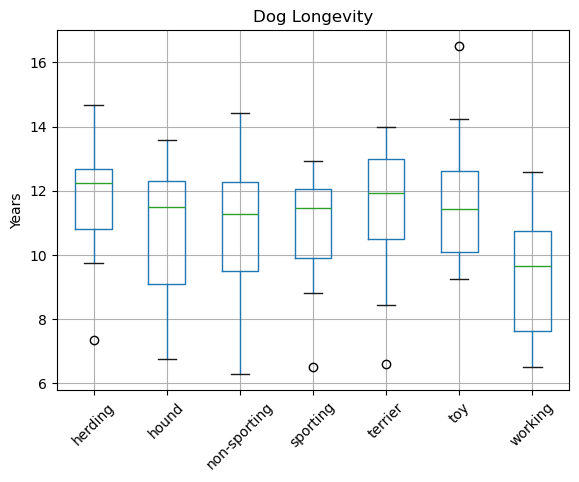

In [60]:
# Pandas

ax = dogs.boxplot(by = "group", column = "longevity", rot = 45)
ax.set(title = "Dog Longevity", xlabel = "", ylabel = "Years")
# Hide grouping title Pandas adds.
ax.get_figure().suptitle("")
plt.show()
plt.close()

In [61]:
# Restore default rcParams
plt.rcdefaults()

### Scatter Plots

Plot popularity against datadog score.

/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 85 rows containing missing values.


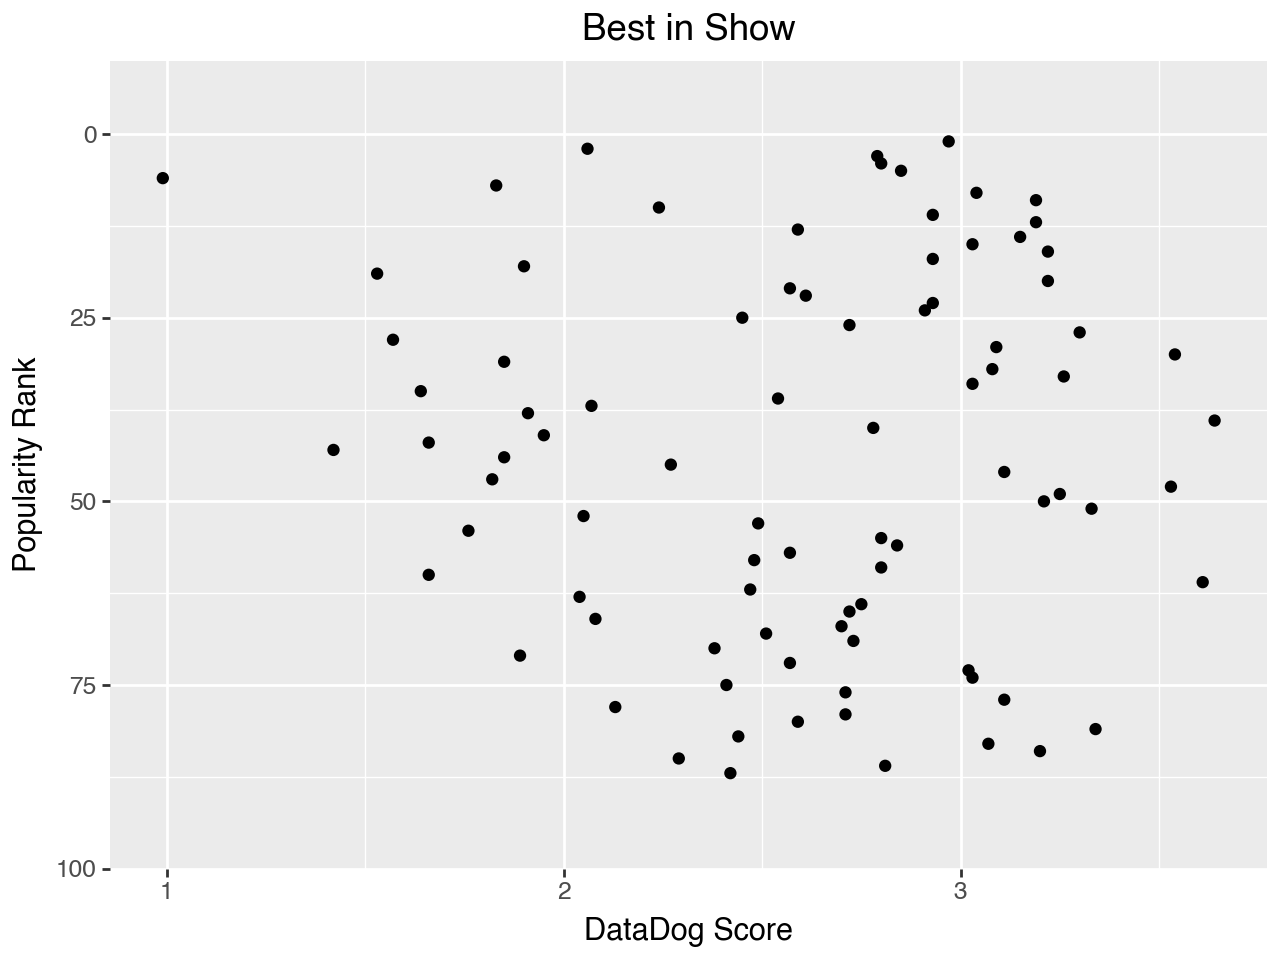

In [62]:
# Plotnine

(
    p9.ggplot(dogs, p9.aes("datadog", "popularity"))
    + p9.geom_point()
    + p9.labs(title = "Best in Show", x = "DataDog Score", y = "Popularity Rank")
    + p9.ylim(95, -5)
)

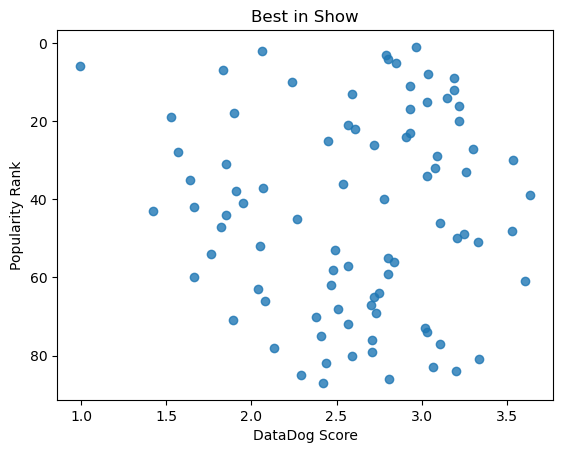

In [63]:
# Seaborn

ax = sns.regplot(x = "datadog", y = "popularity", data = dogs,
                 fit_reg = False)
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ax.set_ylim(reversed(ax.get_ylim()))
plt.show()
plt.close()

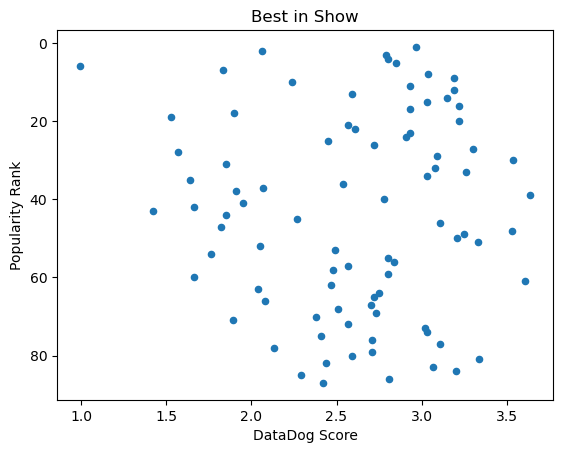

In [64]:
# Pandas

ax = dogs.plot.scatter(x = "datadog", y = "popularity")
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ax.set_ylim(reversed(ax.get_ylim()))
plt.show()
plt.close()

### Comparison of Plotnine, Matplotlib, and Seaborn

#### Overview
| Feature                | Plotnine                        | Matplotlib                    | Seaborn                          |
|------------------------|----------------------------------|--------------------------------|-----------------------------------|
| **Ease of Use**        | Declarative (like ggplot2 in R) | Procedural                    | High-level abstraction over Matplotlib |
| **Focus**              | Grammar of Graphics            | General-purpose plotting      | Statistical visualization        |
| **Customization**      | Limited but aesthetic          | Highly customizable           | Moderately customizable          |
| **Data Integration**   | Works with Pandas DataFrames    | Requires manual data handling | Works seamlessly with DataFrames |


### Grammar Comparison of Plotnine, Matplotlib, and Seaborn

#### Key Grammar Elements

| Grammar Element        | Plotnine                          | Matplotlib                           | Seaborn                                   |
|------------------------|------------------------------------|---------------------------------------|-------------------------------------------|
| **Data Handling**      | Direct integration with DataFrame (`aes`) | Requires manual unpacking of data   | Works directly with DataFrame (`data`)   |
| **Aesthetics Mapping** | Declarative (`aes(x, y, color)`)  | Procedural (`plt.scatter(x, y, c)`)  | Declarative (`hue`, `size`, `style`)     |
| **Layers**             | Additive (`+ geom_*`)            | Procedural (`plt.plot()` per layer)  | Single function for most plots           |
| **Themes**             | Predefined themes (`theme_*`)    | Manual styling via `rcParams`        | Built-in themes (`set_theme`)            |
| **Faceting**           | Declarative (`facet_wrap()`)      | Requires manual looping              | Declarative (`FacetGrid`)                |

---
#### Example: Scatter Plot with Categories

#### Using Plotnine
```python
from plotnine import ggplot, aes, geom_point, theme_minimal
import pandas as pd

# Example data
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 1, 3, 5],
    'category': ['A', 'A', 'B', 'B', 'C']
})

# Plot
plotnine_plot = (
    ggplot(data, aes(x='x', y='y', color='category')) +
    geom_point(size=3) +
    theme_minimal()
)
print(plotnine_plot)

```

#### Using Matplotlib

```python
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6, 4))
for category, group in data.groupby('category'):
    plt.scatter(group['x'], group['y'], label=category, s=50)
plt.title('Scatter Plot (Matplotlib)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Category')
plt.show()

```

#### Using Seaborn

```python
import seaborn as sns

# Plot
sns.set_theme(style="whitegrid")
sns.scatterplot(data=data, x='x', y='y', hue='category', s=100)
plt.title('Scatter Plot (Seaborn)')
plt.show()


```